In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import imutils
from imutils import face_utils

In [119]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

image = cv2.imread("lenna.png")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [120]:
rects = detector(gray, 1)

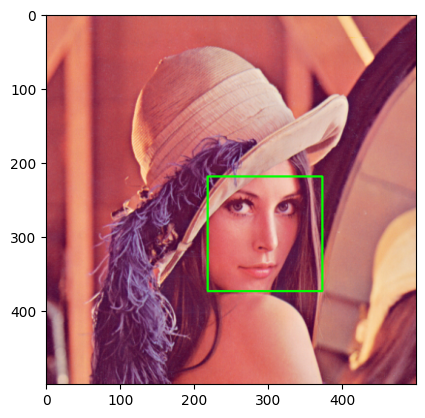

In [121]:
img_copy = image.copy()

#get the faces on the image
for rect in rects:
    x = rect.left()
    y = rect.top()
    w = rect.right() - rect.left()
    h = rect.bottom() - rect.top()
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

In [122]:
def extend_eye_polyline(shape, start, end, extend_by=10):
    eye_points = shape[start:end]
    center = np.mean(eye_points, axis=0)
    extended_points = []
    for point in eye_points:
        vector = point - center
        direction = vector / np.linalg.norm(vector)
        extended_point = point + direction * extend_by
        extended_points.append(extended_point)
    return np.array(extended_points, dtype=np.int32)

In [123]:
def draw_facial_landmarks(image, shape, face_utils):
    clone = image.copy()
    for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
        if name in ["right_eye", "left_eye"]:
            # Extend eye area
            extended_eye = extend_eye_polyline(shape, i, j)
            cv2.polylines(clone, [extended_eye.astype(int)], True, (0, 255, 0), 1)
            
        elif name == "mouth":
            # Draw mouth landmarks
            for (x, y) in shape[i:j]:
                cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
            
            # Optionally, draw a polyline for the mouth
            pts = np.array(shape[i:j], np.int32).reshape((-1,1,2))
            cv2.polylines(clone, [pts], True, (255, 0, 0), 1)

    return clone

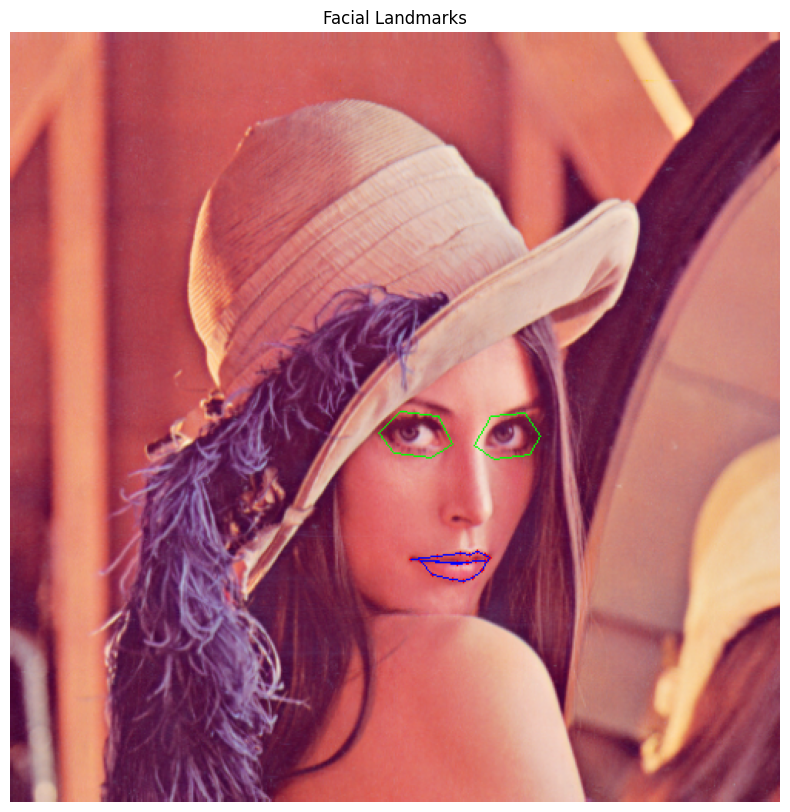

In [124]:
for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    # Draw landmarks on the image
    landmark_image = draw_facial_landmarks(image, shape, face_utils)

# Plot the image with facial landmarks
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(landmark_image, cv2.COLOR_BGR2RGB))
plt.title("Facial Landmarks")
plt.axis('off')
plt.show()


